# Real Time Electricity consumtion Analysis and Predictive modeling

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

In [2]:
os.chdir("Downloads")

In [3]:
df=pd.read_csv("Electricity Consumtion indian in 2019-20.csv")
df

,City,Year,Consumption of Electricity (in lakh units)-Domestic purpose,Consumption of Electricity (in lakh units)-Commercial purpose,Consumption of Electricity (in lakh units)-Industry purpose,Consumption of Electricity (in lakh units)-Public Water Work & Street Light,Consumption of Electricity (in lakh units)-Others,Consumption of Electricity (in lakh units)-Total Consumption
0,Agartala,2018-19,213.98000,30.80000,5.94000,13.130000,55.250000,319.100000
1,Agra,2017-18,9772.00000,3811.00000,2870.00000,583.000000,157.000000,17191.000000
2,Aizawl,2018-19,2386.93000,481.15000,133.41000,437.780000,518.550000,3957.820000
3,Amritsar,2017-18,4076.09000,2131.73000,1479.03000,206.000000,166.240000,8059.090000
4,Aurangabad Maharashtra (Total Consumption/Month),2017-18,275.07000,83.97000,121.08000,18.380000,19.120000,517.620000
5,Belagavi csd -1,2017-18,15.20000,13.10000,1.50000,3.700000,6.800000,40.300000
6,Bengaluru,2017-18,52701.28636,39082.11839,27116.79479,7425.861294,5349.705962,131675.766800
7,Chandigarh (in MU),2017-18,731.94000,494.02000,258.68000,17.730000,86.430000,1588.800000
8,Chennai,2018-19,69265.00000,41870.00000,26515.00000,1893.000000,7795.000000,147338.000000
9,Davanagere,2017-18,1230.00000,443.95000,191.52000,87.820000,621.720000,2627.360000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 8 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   City                                                                         47 non-null     object 
 1   Year                                                                         46 non-null     object 
 2   Consumption of Electricity (in lakh units)-Domestic purpose                  46 non-null     float64
 3   Consumption of Electricity (in lakh units)-Commercial purpose                46 non-null     float64
 4   Consumption of Electricity (in lakh units)-Industry purpose                  46 non-null     float64
 5   Consumption of Electricity (in lakh units)-Public Water Work & Street Light  46 non-null     float64
 6   Consumption of Electricity (in lakh units)-Ot

In [5]:
df.isnull().sum()

City                                                                           0
Year                                                                           1
Consumption of Electricity (in lakh units)-Domestic purpose                    1
Consumption of Electricity (in lakh units)-Commercial purpose                  1
Consumption of Electricity (in lakh units)-Industry purpose                    1
Consumption of Electricity (in lakh units)-Public Water Work & Street Light    1
Consumption of Electricity (in lakh units)-Others                              3
Consumption of Electricity (in lakh units)-Total Consumption                   0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

City                                                                           0
Year                                                                           0
Consumption of Electricity (in lakh units)-Domestic purpose                    0
Consumption of Electricity (in lakh units)-Commercial purpose                  0
Consumption of Electricity (in lakh units)-Industry purpose                    0
Consumption of Electricity (in lakh units)-Public Water Work & Street Light    0
Consumption of Electricity (in lakh units)-Others                              0
Consumption of Electricity (in lakh units)-Total Consumption                   0
dtype: int64

In [8]:
df["Year"]=df['Year'].str[:4].astype(float)

In [9]:
df.dropna(subset=['Consumption of Electricity (in lakh units)-Total Consumption'], inplace=True)

In [10]:
df.fillna(0, inplace=True)

In [11]:
# EDA

In [12]:
# summary Statistics
df.describe()

,Year,Consumption of Electricity (in lakh units)-Domestic purpose,Consumption of Electricity (in lakh units)-Commercial purpose,Consumption of Electricity (in lakh units)-Industry purpose,Consumption of Electricity (in lakh units)-Public Water Work & Street Light,Consumption of Electricity (in lakh units)-Others,Consumption of Electricity (in lakh units)-Total Consumption
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,2017.465116,20880.724831,7635.747111,5110.882237,2597.881309,924.560341,32923.540385
std,0.549841,64629.336673,22859.471226,15558.062842,11020.991457,2194.027129,105191.468409
min,2016.000000,13.400000,5.864000,0.220000,0.342000,0.052000,23.370000
25%,2017.000000,250.810000,95.125000,15.125720,8.956000,6.160000,470.713000
50%,2017.000000,731.940000,481.150000,150.000000,61.910000,55.250000,1946.860000
75%,2018.000000,4202.812275,2333.825000,1865.450000,354.560000,443.889090,9301.958660
max,2018.000000,344276.000000,117285.000000,88547.000000,68069.000000,9357.000000,574293.000000


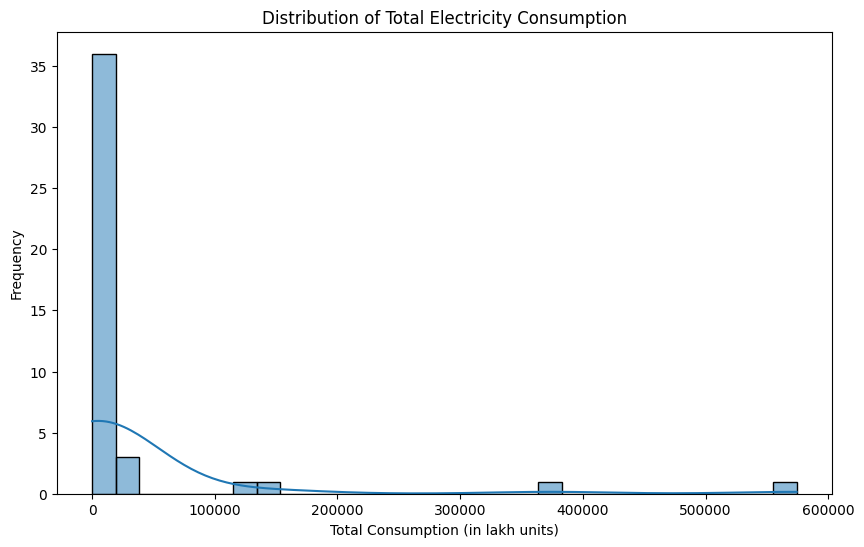

In [13]:
# Distribution of total consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['Consumption of Electricity (in lakh units)-Total Consumption'], bins=30, kde=True)
plt.title('Distribution of Total Electricity Consumption')
plt.xlabel('Total Consumption (in lakh units)')
plt.ylabel('Frequency')
plt.show()

In [14]:
df.columns = df.columns.str.strip()
print("Stripped columns:", df.columns)

Stripped columns: Index(['City', 'Year',
       'Consumption of Electricity (in lakh units)-Domestic purpose',
       'Consumption of Electricity (in lakh units)-Commercial purpose',
       'Consumption of Electricity (in lakh units)-Industry purpose',
       'Consumption of Electricity (in lakh units)-Public Water Work & Street Light',
       'Consumption of Electricity (in lakh units)-Others',
       'Consumption of Electricity (in lakh units)-Total Consumption'],
      dtype='object')


<Figure size 1400x1000 with 0 Axes>

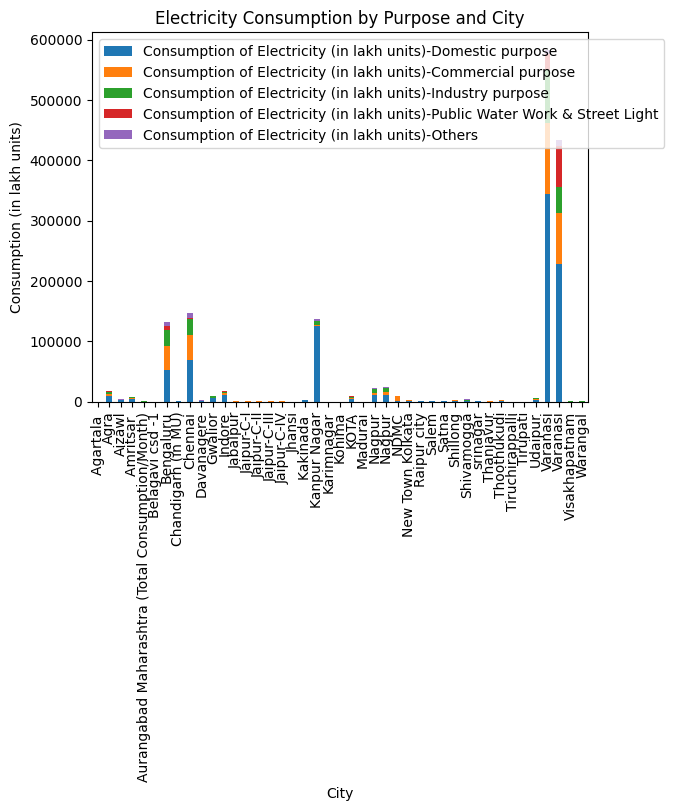

In [15]:
# Consumption by purpose
plt.figure(figsize=(14, 10))
df.set_index('City')[['Consumption of Electricity (in lakh units)-Domestic purpose', 'Consumption of Electricity (in lakh units)-Commercial purpose', 'Consumption of Electricity (in lakh units)-Industry purpose', 'Consumption of Electricity (in lakh units)-Public Water Work & Street Light', 'Consumption of Electricity (in lakh units)-Others']].plot(kind='bar', stacked=True)
plt.title('Electricity Consumption by Purpose and City')
plt.ylabel('Consumption (in lakh units)')
plt.legend(loc='upper left')
plt.show()

In [16]:
# correlation Analysis

In [17]:
df.head(1)

,City,Year,Consumption of Electricity (in lakh units)-Domestic purpose,Consumption of Electricity (in lakh units)-Commercial purpose,Consumption of Electricity (in lakh units)-Industry purpose,Consumption of Electricity (in lakh units)-Public Water Work & Street Light,Consumption of Electricity (in lakh units)-Others,Consumption of Electricity (in lakh units)-Total Consumption
0,Agartala,2018.0,213.98,30.8,5.94,13.13,55.25,319.1


In [18]:
corr_matrix = df[['Consumption of Electricity (in lakh units)-Domestic purpose', 'Consumption of Electricity (in lakh units)-Commercial purpose', 'Consumption of Electricity (in lakh units)-Industry purpose', 'Consumption of Electricity (in lakh units)-Public Water Work & Street Light', 'Consumption of Electricity (in lakh units)-Others', 'Consumption of Electricity (in lakh units)-Total Consumption']].corr()
corr_matrix

,Consumption of Electricity (in lakh units)-Domestic purpose,Consumption of Electricity (in lakh units)-Commercial purpose,Consumption of Electricity (in lakh units)-Industry purpose,Consumption of Electricity (in lakh units)-Public Water Work & Street Light,Consumption of Electricity (in lakh units)-Others,Consumption of Electricity (in lakh units)-Total Consumption
Consumption of Electricity (in lakh units)-Domestic purpose,1.000000,0.941949,0.946551,0.766563,0.820307,0.961697
Consumption of Electricity (in lakh units)-Commercial purpose,0.941949,1.000000,0.981944,0.796360,0.887174,0.992728
Consumption of Electricity (in lakh units)-Industry purpose,0.946551,0.981944,1.000000,0.692883,0.839468,0.987465
Consumption of Electricity (in lakh units)-Public Water Work & Street Light,0.766563,0.796360,0.692883,1.000000,0.765943,0.785881
Consumption of Electricity (in lakh units)-Others,0.820307,0.887174,0.839468,0.765943,1.000000,0.844417
Consumption of Electricity (in lakh units)-Total Consumption,0.961697,0.992728,0.987465,0.785881,0.844417,1.000000


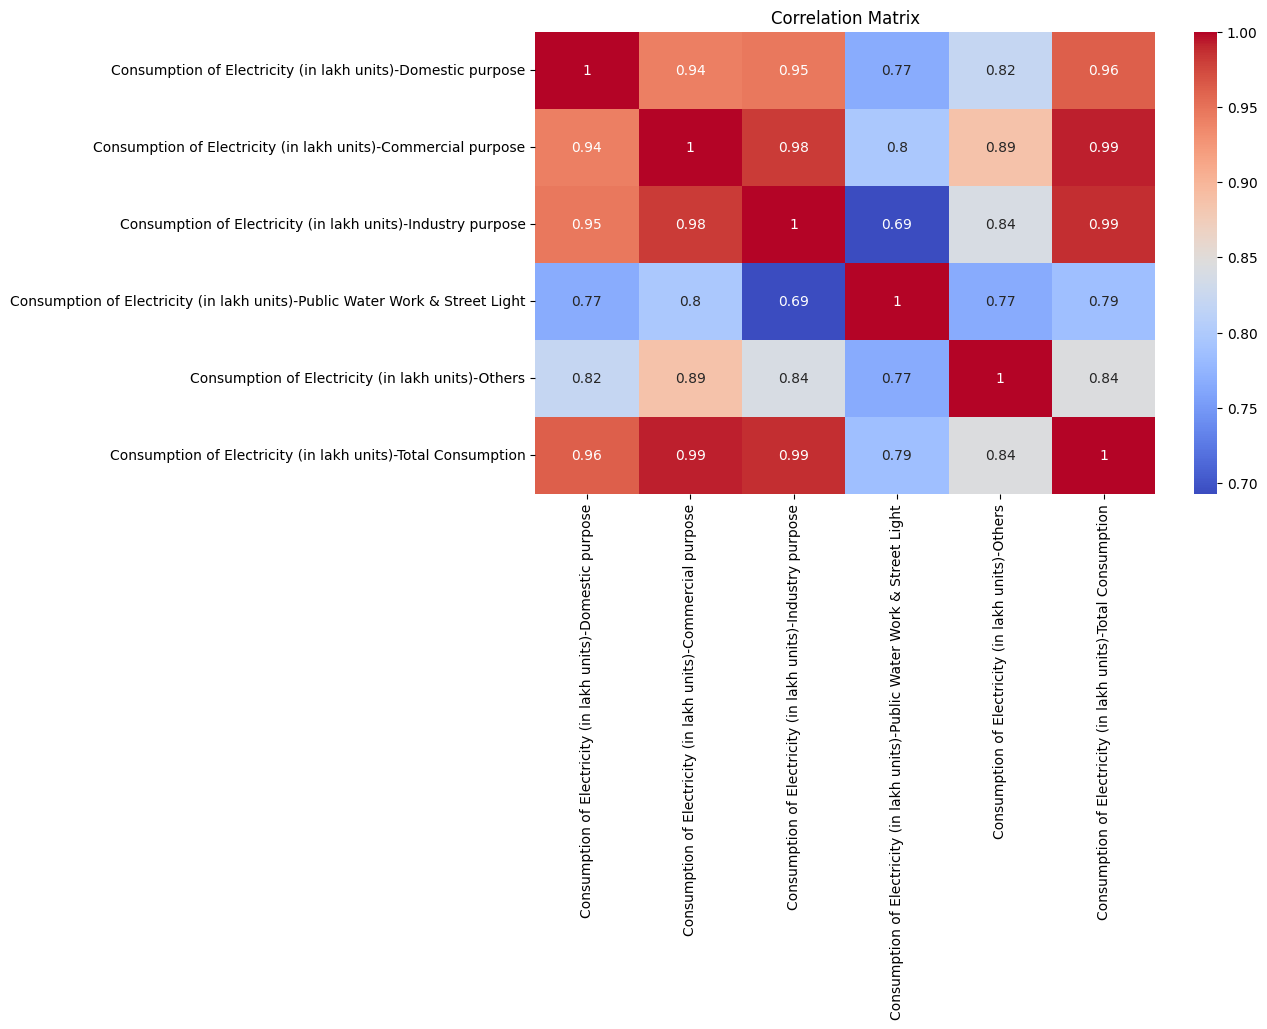

In [19]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Preditive Analytics

In [21]:
df.head(1)

,City,Year,Consumption of Electricity (in lakh units)-Domestic purpose,Consumption of Electricity (in lakh units)-Commercial purpose,Consumption of Electricity (in lakh units)-Industry purpose,Consumption of Electricity (in lakh units)-Public Water Work & Street Light,Consumption of Electricity (in lakh units)-Others,Consumption of Electricity (in lakh units)-Total Consumption
0,Agartala,2018.0,213.98,30.8,5.94,13.13,55.25,319.1


In [22]:
# Define features and target
X = df[['Consumption of Electricity (in lakh units)-Domestic purpose', 'Consumption of Electricity (in lakh units)-Commercial purpose', 'Consumption of Electricity (in lakh units)-Industry purpose', 'Consumption of Electricity (in lakh units)-Public Water Work & Street Light', 'Consumption of Electricity (in lakh units)-Others']]
y = df['Consumption of Electricity (in lakh units)-Total Consumption']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Make predictions
y_pred = model.predict(X_test)

In [26]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [27]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MAE: 18545.071092512535
MSE: 2102618966.9621985
RMSE: 45854.32331811471
R2 Score: 0.9339850578730652


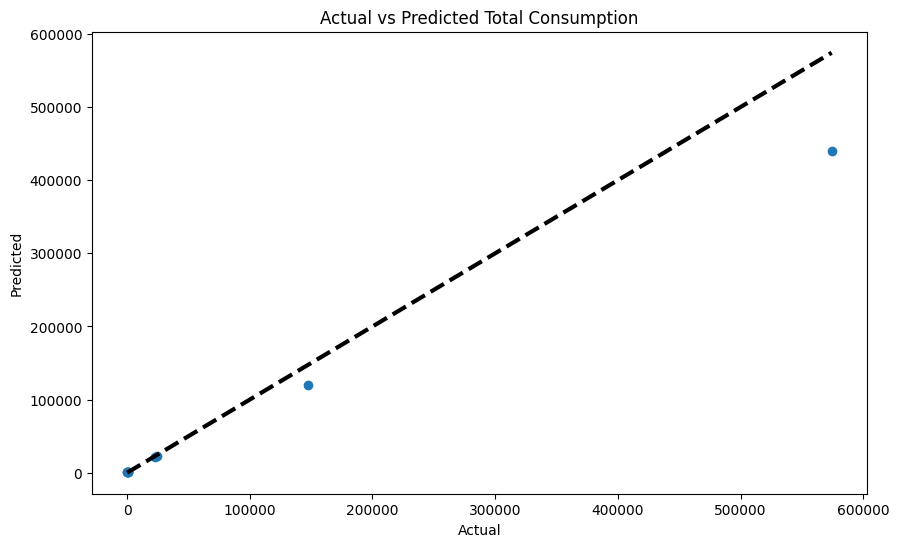

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Total Consumption')
plt.show()

In [29]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Insights
print("Insights from the model:")
print(f"Intercept: {model.intercept_}")
print("Coefficients indicate the contribution of each feature to the total electricity consumption.")

                                                    Coefficient
Consumption of Electricity (in lakh units)-Dome...     0.052248
Consumption of Electricity (in lakh units)-Comm...     1.232720
Consumption of Electricity (in lakh units)-Indu...     2.504447
Consumption of Electricity (in lakh units)-Publ...     2.278710
Consumption of Electricity (in lakh units)-Others     -0.809090
Insights from the model:
Intercept: 703.7857689764569
Coefficients indicate the contribution of each feature to the total electricity consumption.
